**Marketing Campaign for Banking Products**


We have data for the customers of the bank. Our aim is to build a modlel to help the bank to identify the potential customers who have higher probability of purchasing the loan.

In [1]:
#Importig Libraries
import numpy as np # Numpy for neumeric algebra
import pandas as pd # pandas for data 
import seaborn as sns # seaborn and matplotlib for data visualization 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the Data**

In [2]:
ds=pd.read_excel("/datasets_48024_87370_Bank_Personal_Loan_Modelling.xlsx", "Data")
ds.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
ds.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
ds.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
ds.shape

(5000, 14)

In [7]:
ds.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
ds.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

From the above tables we got to know that:

1) Our data has 5000 row and 14 attributes.

2) Our data is clean (no null values present in the data).

3) Our data is numeric in nature.

4) Experience can not be negative but our table is showing the negative values also. So, we have to clean this attribute.

In [9]:
#To check whether age and experience are correlated or not.
ds['Experience'].corr(ds['Age'])

0.9942148569683321

In [10]:
correlation = ds.corr(method = 'pearson')
correlation

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


**Cleaning data**

The id of a person will not help our model to reach a conclusion So, we can drop the id column. Also, the experience is highly correlated to age so we can also drop the experience column.

In [11]:
ds = ds.drop(['ID','Experience'],axis=1)

**Exploratory Data Analysis**

In [15]:
ds.nunique(axis=0)

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

From the above table we can conclude that various columns have categorical values like Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard. 

Lets find out the number of values in each of these columns.

In [17]:
list = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for i in list:
    print(i)
    print(ds[i].value_counts())
    print("**"*20)

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
****************************************
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
****************************************
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
****************************************
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
****************************************
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
****************************************
Online
1    2984
0    2016
Name: Online, dtype: int64
****************************************
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
****************************************


Lets plot these data on graph.

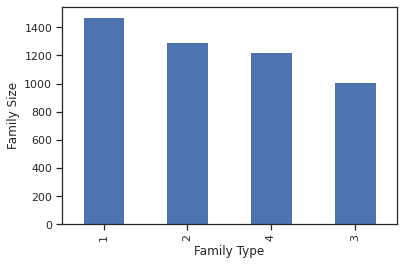

In [26]:
#For Families
plt.xlabel('Family Type')
plt.ylabel('Family Size')
ds['Family'].value_counts().plot(kind = 'bar')

From the above graph we can conclude about the family size of the customers that most of the customers are single.

Let us now plot the education status of the customers.

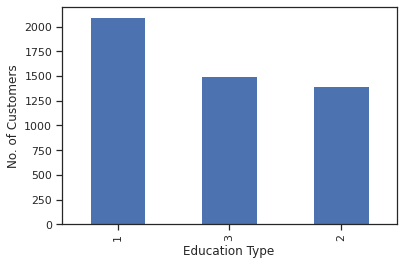

In [27]:
#For Education
plt.xlabel('Education Type')
plt.ylabel('No. of Customers')
ds['Education'].value_counts().plot(kind = 'bar')

From the above graph it seems that 2096 of the customers are undergraduate, 1501 are professionals and 1403 are graduate.


Let us now plot about Pesronal Loan of previous year.

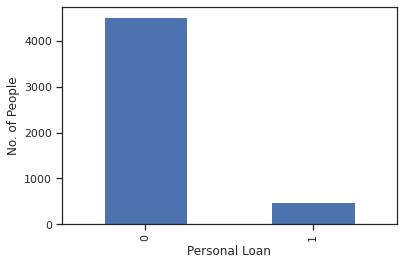

In [28]:
plt.xlabel('Personal Loan')
plt.ylabel('No. of Customers')
ds['Personal Loan'].value_counts().plot(kind = 'bar')

From the above graph it seems very few people have taken pesonal loan previous year. Only 480 people from 5000 has acquired the loan. That is only 9.6% of total customers took the loan.

Lets plot a graph for the customers having certificate of deposit account with the bank.

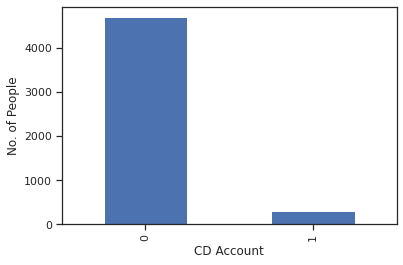

In [29]:
plt.xlabel('CD Account')
plt.ylabel('No. of Customers')
ds['CD Account'].value_counts().plot(kind = 'bar')

From the above graph it also seems very low. Only 302 people from 5000 people have this account. Which is only 6.04% of the total customers.

Lets plot a graph for the customers having security accounts in the bank.

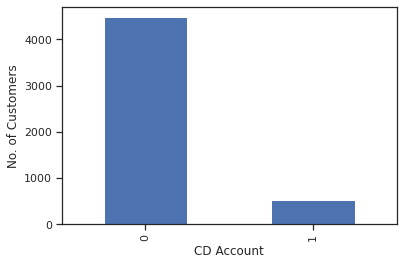

In [30]:
plt.xlabel('CD Account')
plt.ylabel('No. of Customers')
ds['Securities Account'].value_counts().plot(kind = 'bar')

From the above graph only 522 people are having Security account in the bank. That is only 10.4% of total customers are having this account.

Lets plot the graph for the customers using the online facilities and credit card facilities.

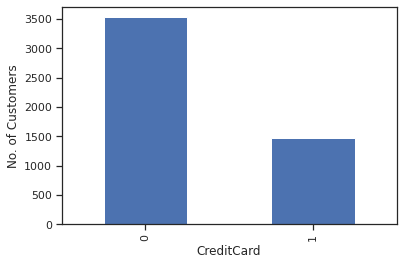

In [32]:
plt.xlabel('CreditCard')
plt.ylabel('No. of Customers')
ds['CreditCard'].value_counts().plot(kind = 'bar')

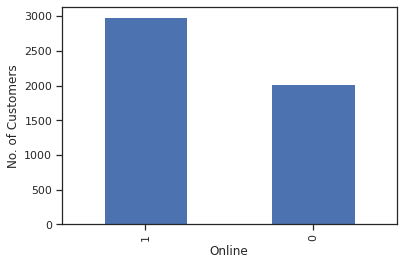

In [34]:
plt.xlabel('Online')
plt.ylabel('No. of Customers')
ds['Online'].value_counts().plot(kind = 'bar')

From the above plotted graph we can conclude that many people are using online facilities provided by bank but only few are using credit cards. 

Around 59% people are using online facilities provided by the bank and 29% peole are using the credit card facilties.

We can drop the zipcode column because it can not affect the personal loan of customers.

In [35]:
ds = ds.drop('ZIP Code',axis = 1)
ds

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


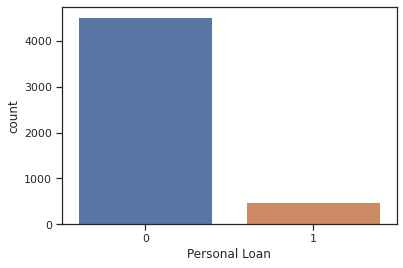

In [36]:
sns.countplot(ds['Personal Loan'])

CCAvg is the monthly amount spend by the customer from credit card. Lets check about how many people are not using the card.

In [37]:
sum(ds['CCAvg']==0)

106

After finding the no. above we can conclude that out of 108 users of credit card, only single person is not spending from credit card.

Lets find out house mortgage values of people.

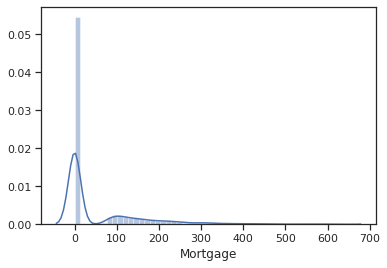

In [38]:
sns.distplot(ds['Mortgage'])

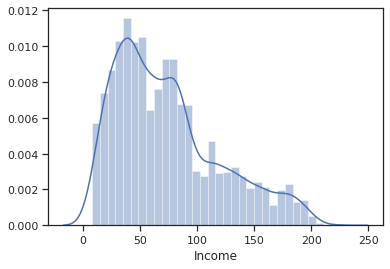

In [48]:
sns.distplot(ds.Income)

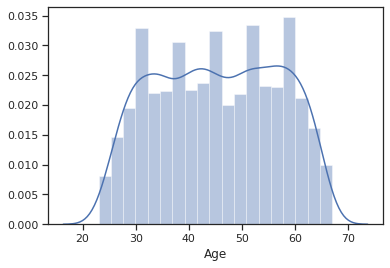

In [49]:
sns.distplot(ds.Age)

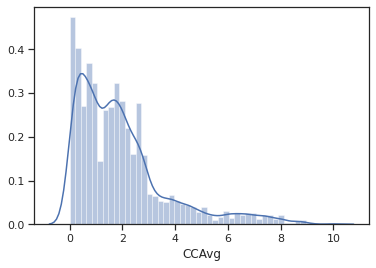

In [50]:
sns.distplot(ds.CCAvg)

From the above graphs we can conclude that CCavg and income are not narmalized so we have to normalize these variables first before using them in our model.Also we don't need to use zip code.

In [53]:
zeroMortgage = 0
for x in ds['Mortgage']:
    if x == 0:
        zeroMortgage += 1
print('Number of people with zero mortgage ', zeroMortgage)

Number of people with zero mortgage  3462


Around 3462 customers has house mortgage value equal to zero.

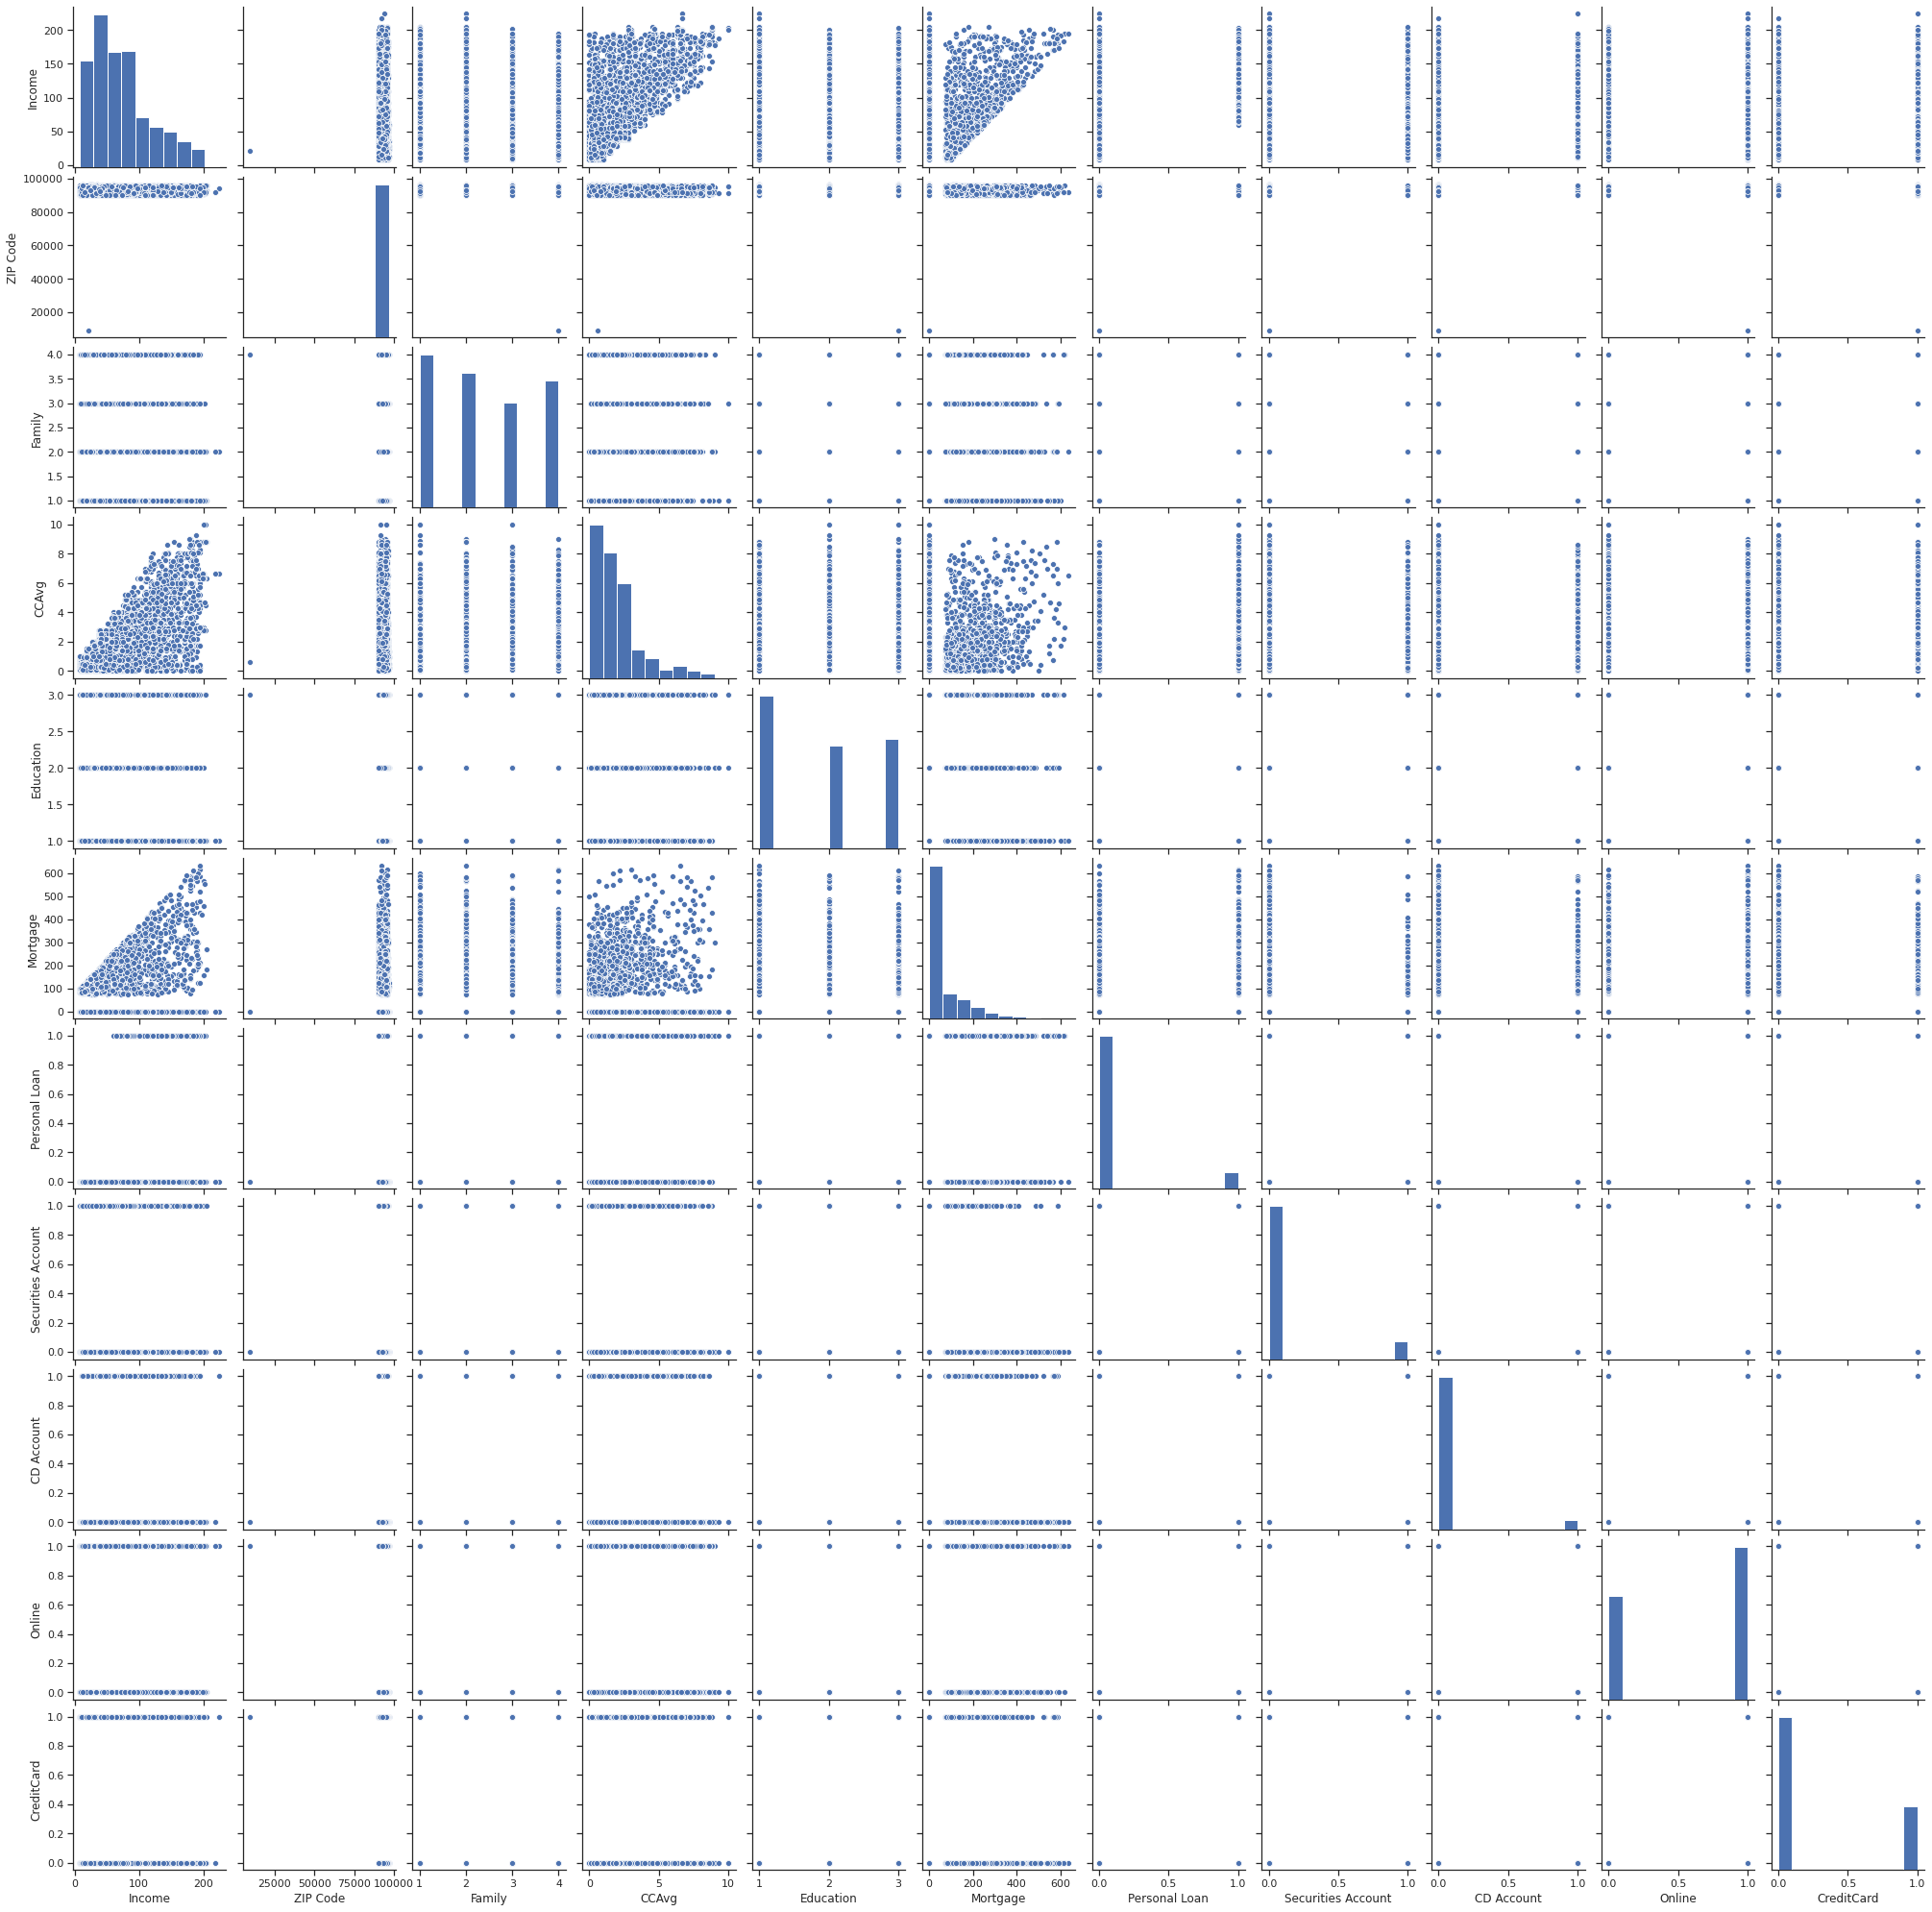

In [12]:
sns.pairplot(ds.iloc[:,1:])

In [52]:
sum(ds.duplicated()==True)

13

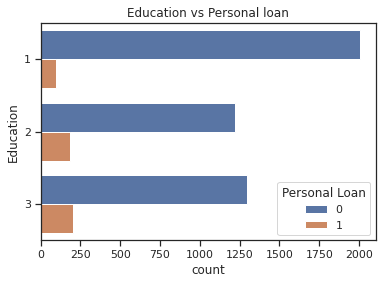

In [56]:
plt.title('Education vs Personal loan')
plt.xlabel('Personal loan')
plt.ylabel('Education')
sns.countplot(y = 'Education', data = ds, hue = 'Personal Loan')

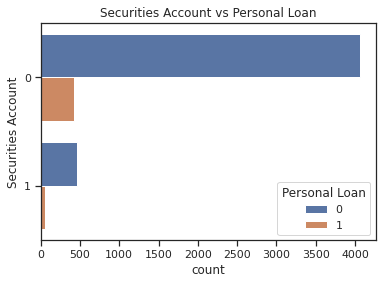

In [57]:
plt.title('Securities Account vs Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Security Account')
sns.countplot(y = 'Securities Account', data = ds, hue = 'Personal Loan')

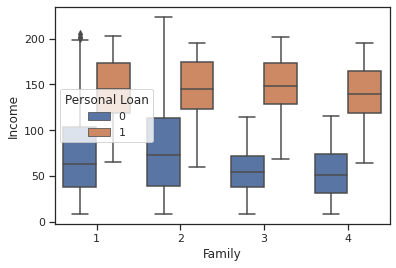

In [58]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data = ds)

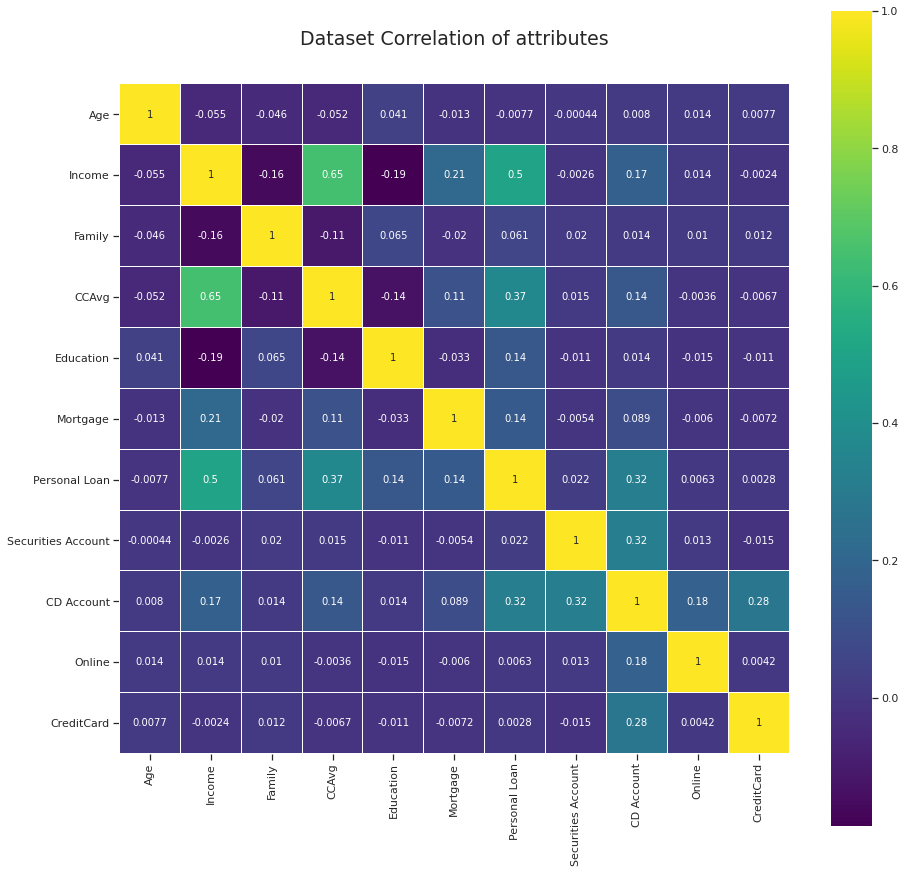

In [39]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Dataset Correlation of attributes', y=1.05, size=19)
sns.heatmap(ds.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Lets use x features for our model and y features for personal loan.

In [59]:
x = ds[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
y = ds['Personal Loan'].values

**FEATURE SCALING AND TRANSFORMATION**

We have found out that we have income and ccavg value skewed so we have to transform them.

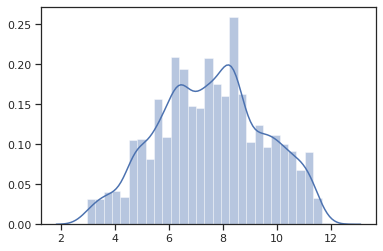

In [86]:
p_trans = PowerTransformer(method='yeo-johnson',standardize=False)
p_trans.fit(x['Income'].values.reshape(-1,1))
sns.distplot(p_trans.transform(x['Income'].values.reshape(-1,1)))

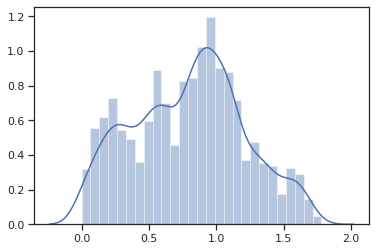

In [87]:
p_trans = PowerTransformer(method='yeo-johnson',standardize=False)
p_trans.fit(x['CCAvg'].values.reshape(-1,1))
sns.distplot(p_trans.transform(x['CCAvg'].values.reshape(-1,1)))

ccavg and income are transformed. But now we have to transform the mortgage column. We have found that many values are 0 and other are only few.

In [67]:
x['MortgageN'] = pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)

**TRAINING AND TESTING DATA**

In [111]:
scx = StandardScaler()
scy = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0, stratify = y)
scx.fit_transform(x_train)
scx.transform(x_test)
#scy.fit_transform(y_train.reshape(-1,1))
#scy.transform(y_test.reshape(-1,1))

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ...,  2.97177736,
        -0.24878345, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ...,  2.97177736,
        -0.24878345, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -0.33649896,
        -0.24878345,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  2.97177736,
        -0.24878345, -0.47490853]])

**Logistic Regression Model**

In [128]:
model = LogisticRegression()

In [129]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
y_predict = model.predict(x_test)

In [134]:
print("MAE:",metrics.mean_absolute_error(y_test,y_predict))
print("R2 score:",metrics.r2_score(y_test,y_predict))

MAE: 0.05533333333333333
R2 score: 0.36240167158308745


In [135]:
print(metrics.accuracy_score(y_test,y_predict))

0.9446666666666667


In [136]:
print(metrics.accuracy_score(y_train,model.predict(x_train)))

0.9494285714285714


In [139]:
print(confusion_matrix(y_test,y_pred))

[[1332   24]
 [  59   85]]


In [140]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.59      0.67       144

    accuracy                           0.94      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



From the above result we can see that accuracy score for the test data is 94%. But we can see in confusion matrix that false negative are very much that is 40%.

Now lets check the accuracy with the other models as well.

**SVM Model**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. We will use support vector classifier(svc) for this.

In [151]:
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(x_train,y_train)

In [149]:
y_pred = clf.predict(x_test)

In [150]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.09533333333333334
R2 score: -0.09851278269419872
Accuracy score for test data 0.9046666666666666


In [152]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [153]:
print(confusion_matrix(y_test,y_pred))

[[1356    0]
 [ 143    1]]


In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       1.00      0.01      0.01       144

    accuracy                           0.90      1500
   macro avg       0.95      0.50      0.48      1500
weighted avg       0.91      0.90      0.86      1500



From the above result we can see that the accuracy score using svm is *90*% however it was *94*% in logistic regression. So logistic regression is working good rather than svm.

**DECISION TREE**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [157]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [169]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 

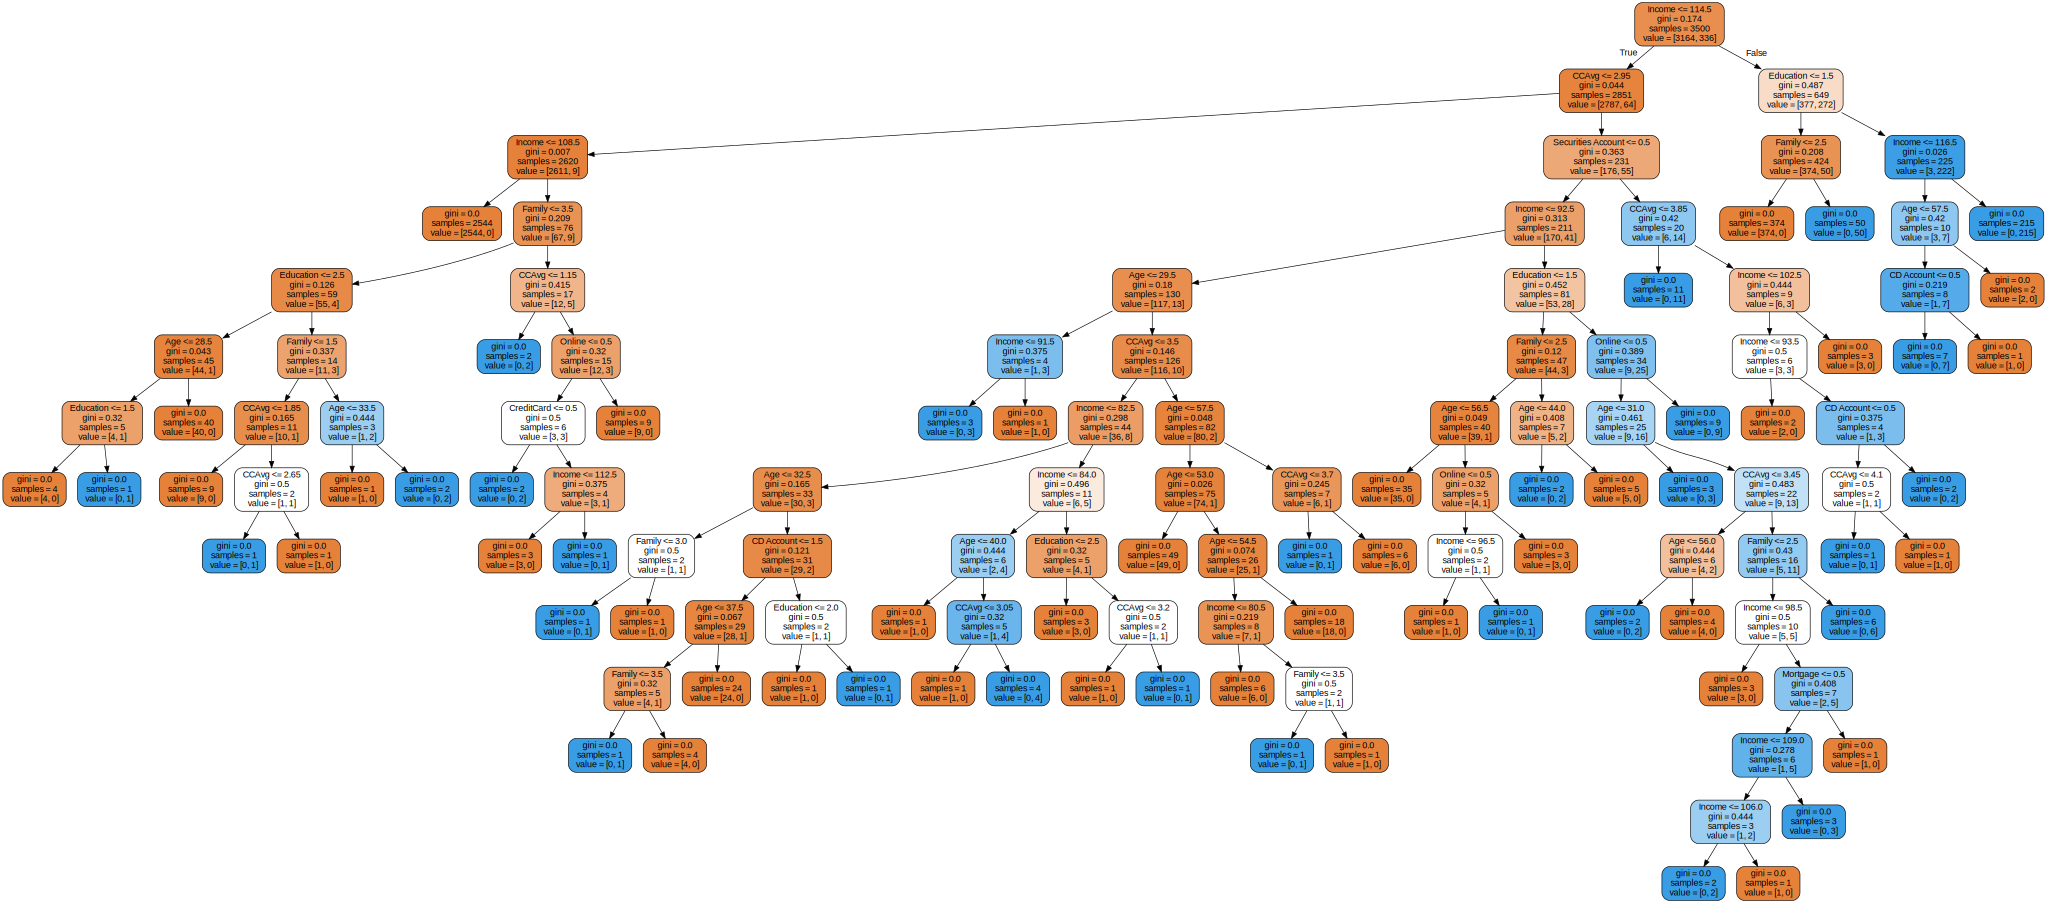

In [167]:
graph

In [172]:
y_pred = clf.predict(x_test)

In [173]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.019333333333333334
R2 score: 0.777224680432645
Accuracy score for test data 0.9806666666666667


In [174]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [175]:
print(confusion_matrix(y_test,y_pred))

[[1343   13]
 [  16  128]]


In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.89      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



From the above result we can conclude that this model is working very much better than other two model. It is showing *98*% accuracy score. Apart from this, we can even find that the false negative and false positive are also very less as compared to above to models.

**RANDOM FOREST**

Random forest is an ensemble machine learning algorithm.

It is perhaps the most popular and widely used machine learning algorithm given its good or excellent performance across a wide range of classification and regression predictive modeling problems.

It works in four steps:

1)Select random samples from a given dataset.

2)Construct a decision tree for each sample and get a prediction result from each decision tree.

3)Perform a vote for each predicted result.

4)Select the prediction result with the most votes as the final prediction.

In [177]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [178]:
y_pred = clf.predict(x_test)

In [179]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.011333333333333334
R2 score: 0.8694075712881022
Accuracy score for test data 0.9886666666666667


In [180]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [182]:
print(confusion_matrix(y_test,y_pred))

[[1353    3]
 [  14  130]]


In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.90      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



The above result clearly showing that the model of random forest is working very good. The accuracy score is above *98*% for test data which is highest in all the algorithm we have used till now. Also the confusion matrix is also better than the previous results.

**NAIVE BAYES**

Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

P(class|data) = (P(data|class) * P(class)) / P(data)
Where P(class|data) is the probability of class given the provided data

In [185]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [186]:
y_pred = model.predict(x_test)

In [187]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.11266666666666666
R2 score: -0.2982423795476894
Accuracy score for test data 0.8873333333333333


In [188]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8805714285714286


In [189]:
print(confusion_matrix(y_test,y_pred))

[[1243  113]
 [  56   88]]


In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



The above result is showing that the accuracy score for naive bayes algorithm in this case is not very good. From all the models it is least till now. It is *89*% which is less than other algos.

**KNN algorithm**

In [195]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [197]:
y_pred = knn.predict(x_test)

In [198]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.07266666666666667
R2 score: 0.16267207472959677
Accuracy score for test data 0.9273333333333333


In [199]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8805714285714286


In [200]:
print(confusion_matrix(y_test,y_pred))

[[1324   32]
 [  77   67]]


In [201]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1356
           1       0.68      0.47      0.55       144

    accuracy                           0.93      1500
   macro avg       0.81      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



From the above result we can find out that it is working better than naive bayes algo but not with any other. Its accuracy score is *93*%.

**NEURAL NETWORK**

A neural network consists of units (neurons), arranged in layers, which convert an input vector into some output. Each unit takes an input, applies a (often nonlinear) function to it and then passes the output on to the next layer.

Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples.

In [202]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [204]:
y_pred = mlp.predict(x_test)

In [205]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.02
R2 score: 0.7695427728613569
Accuracy score for test data 0.98


In [206]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8805714285714286


In [207]:
print(confusion_matrix(y_test,y_pred))

[[1345   11]
 [  19  125]]


In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.87      0.89       144

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



From the above result it is clear that it's accuracy score is *98*% which is same as Decision tree and Random Forest model.

**CONCLUSION**

On comparing all the above models we can conclude that the Random Forest Model is more accurate than other models and the confusion matrix is also better than the other models